# Testing_manual

### Here I test ways to represent the Wigner function

##### We want to first define our state operator which we can transform into a Wigner representation by use of the methods of the course. Next, we want to determine the probability distributions along certain angles and gather samples from these using rejection sampling.

##### First we import the necessary packages

In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad

##### Say we want our density (state) operator to be expressed as a coherent state

In [2]:
N = 20

rho_coherent = qt.coherent_dm(N, np.sqrt(2))

(<Figure size 1200x300 with 3 Axes>,
 <Axes: xlabel='Fock number', ylabel='Occupation probability'>)

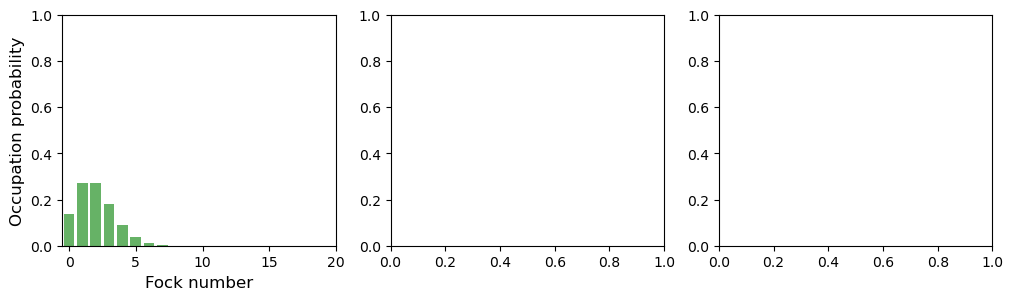

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

qt.plot_fock_distribution(rho_coherent, fig=fig, ax=axes[0])

##### For a more complete phase-space probability distribution function we use the Wigner function

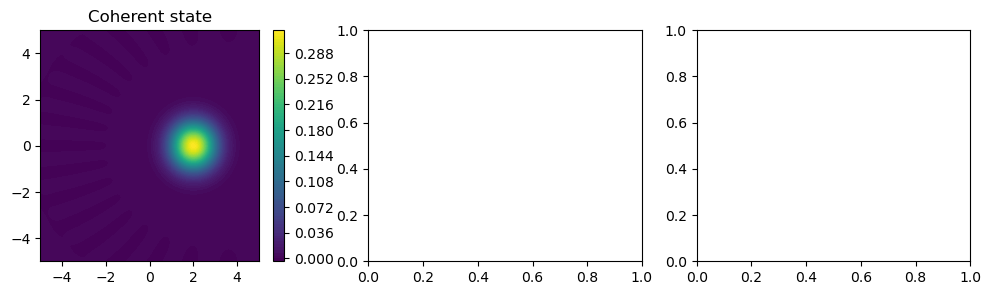

In [4]:
xvec = np.linspace(-5,5,200)

W_coherent = qt.wigner(rho_coherent, xvec, xvec)

fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cbar = plt.colorbar(cont0)

plt.show()

##### Now we want to derive the probability distribution along different angles at x=0

In [5]:
print(W_coherent.shape)

(200, 200)


In [6]:
# We initialize the array for all the data of theta=0

sum = 0
y_val = 100

W0 = W_coherent[y_val]

x_theta0 = [i * 0. for i in range(len(W0))]
x_theta0 = np.array(x_theta0)

# We update each element to the integration value

for i in range(len(W0)):
    sum += W0[i]

for i in range(len(W0)):
    x_theta0[i] = sum

# The values between x=100 and x=110 are printed.

print(x_theta0[100:110])

[11.22017926 11.22017926 11.22017926 11.22017926 11.22017926 11.22017926
 11.22017926 11.22017926 11.22017926 11.22017926]


##### Say we want to value of integrating with theta=45 deg

In [7]:
# We initialize an array for all the values obtained by integration of the specific angle

x_theta45 = [i * 0. for i in range(len(W0))]
x_theta45 = np.array(x_theta45)

# We update each element to the integration value

for j in range(len(W0)):
    sum = 0.

    k = 0

    while k < y_val:
        if k+j < len(W0):
            sum += W_coherent[y_val+k][k+j]
        sum += W_coherent[y_val-k][j-k]

        k += 1

    x_theta45[j] = sum

# The values between x=130 and x=150 are printed. Notice that this confirms the plot of the coherent state.

print(x_theta45[130:150])

[7.28805277 7.4667771  7.63000384 7.7765004  7.90514281 8.01493087
 8.10500162 8.17464126 8.22329504 8.250575   8.25626538 8.24032556
 8.2028905  8.14426871 8.06493773 7.9655372  7.8468598  7.70984015
 7.55554188 7.3851433 ]


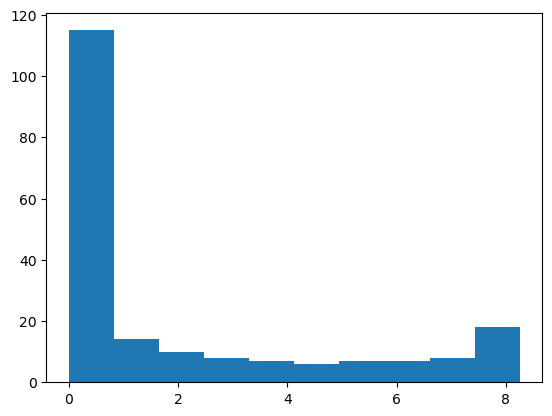

In [9]:
plt.hist(x_theta45)
plt.show()